In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
#표 한글, 음수표현 처리
import matplotlib
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# vscode) hide panel : ctrl + J

In [8]:
ABC = pd.read_excel('ppl_all_brand_category.xlsx')
AP = pd.read_excel('ppl_all_product.xlsx')

# All Brand Category
'브랜드명'과'품목'으로 구성된 Dataframe

In [7]:
ABC.head()

,더메디닥터 클렌징,킵쿨 에센스,S2ND 크림,에르쯔틴 쿨링젤,에스미아 쿠션,에르쯔틴 젤,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,해피홈 트러블키트,MINI AUDREY(미니오드리),...,모모백 - 카멜,Two Color Square,J192MSE027,오버사이즈 베이직 후드티(오렌지),19SS 스트라이프 더블버튼 수트,데님 반바지,로고프린팅 루즈핏티셔츠,2019 S/S 소매 레터링 더블재킷,기본핏자켓,리잘록 레터링포인트 배색가디건
0,0.0,0,0,0,4.49438,0,0,0,0,0,...,0,0,0.0,0,0,24.61538,0,0,0.0,0
1,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,0,0.0,0,0,24.10256,0,0,0.0,0
2,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0,0.0,0,0,23.07692,0,0,0.0,0
3,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0,0.0,0,0,16.92307,0,0,0.0,0
4,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,0,100.0,0,0,17.94871,0,0,0.0,0


In [9]:
ABC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 446 entries, 더메디닥터 클렌징 to 리잘록 레터링포인트 배색가디건
dtypes: float64(190), int64(256)
memory usage: 212.7 KB


In [94]:
sum(ABC.isnull().sum())

0

In [28]:
# row별(446개) 평균 컬럼 추가

평균 = []
for i in range(0,len(ABC.index)):
    평균.append(ABC.iloc[i].mean())
평균 = pd.DataFrame(평균)
ABC['평균'] = 평균
ABC.columns


Index(['더메디닥터 클렌징', '킵쿨 에센스', 'S2ND 크림', '에르쯔틴 쿨링젤', '에스미아 쿠션', '에르쯔틴 젤',
       '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향', '해피홈 트러블키트', 'MINI AUDREY(미니오드리)',
       ...
       'Two Color Square', 'J192MSE027', '오버사이즈 베이직 후드티(오렌지)',
       '19SS 스트라이프 더블버튼 수트', '데님 반바지', '로고프린팅 루즈핏티셔츠', '2019 S/S 소매 레터링 더블재킷',
       '기본핏자켓 ', '리잘록 레터링포인트 배색가디건', '평균'],
      dtype='object', length=447)

In [65]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
ABC.index = np.arange(-30,31)
ABC.head()

,더메디닥터 클렌징,킵쿨 에센스,S2ND 크림,에르쯔틴 쿨링젤,에스미아 쿠션,에르쯔틴 젤,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,해피홈 트러블키트,MINI AUDREY(미니오드리),...,Two Color Square,J192MSE027,오버사이즈 베이직 후드티(오렌지),19SS 스트라이프 더블버튼 수트,데님 반바지,로고프린팅 루즈핏티셔츠,2019 S/S 소매 레터링 더블재킷,기본핏자켓,리잘록 레터링포인트 배색가디건,평균
-30,0.0,0,0,0,4.49438,0,0,0,0,0,...,0,0.0,0,0,24.61538,0,0,0.0,0,19.918627
-29,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,0.0,0,0,24.10256,0,0,0.0,0,20.656514
-28,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0.0,0,0,23.07692,0,0,0.0,0,20.314441
-27,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0.0,0,0,16.92307,0,0,0.0,0,19.174058
-26,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,100.0,0,0,17.94871,0,0,0.0,0,19.689324


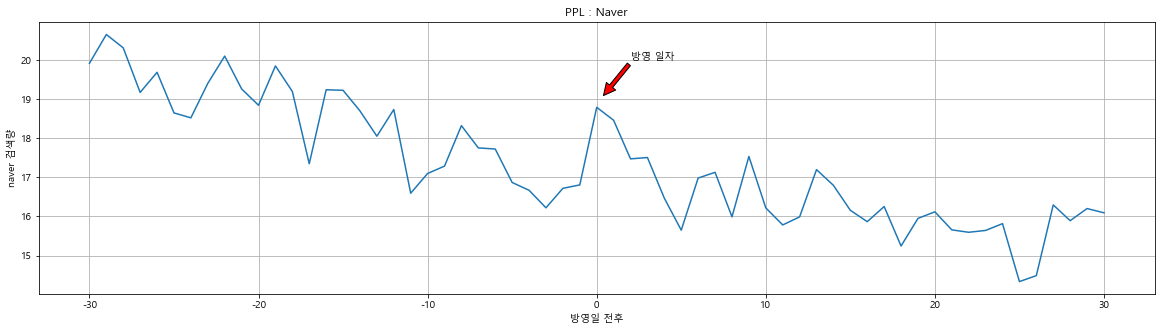

In [96]:
plt.figure(figsize=(20,5))
ABC['평균'].plot()
plt.xlabel('방영일 전후')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# plt.text(30,ABC['평균'][30],'방영일자')
plt.annotate('방영 일자',
            xy = (0+0.4, ABC['평균'][0]+0.3),
            xytext = (0+2, ABC['평균'][0]+1.2),
            arrowprops={'facecolor' : 'red'}
            )
plt.grid(True)

plt.show()

# All Product(name)
'상품명'으로만 구성된 Dataframe

In [78]:
AP.head()

,글리셜 미셀라 클렌징 워터,킵쿨 수드 대나무 세럼,핑크터치 올인원 톤업 크림,리쥬브네이션 플레게 젤,풀커버 골드 에어쿠션,와영 에센스,스팀베이스 마스크/팩,유한양행 클리어키트,폴스부띠끄 가방,언카인드 원피스,...,글램지 가방,겟미블링 귀걸이,모조에스핀 원피스,랑베르세 후드,코모도 수트.1,씨씨콜렉트 팬츠,씨씨콜렉트 티셔츠,씨씨콜렉트 자켓,쥬시쥬디 자켓,씨씨콜렉트 가디건
0,0.0,0.00000,19.35483,0.00000,0,0,0,0,75.82582,0,...,40.74074,51.78571,70.86031,0,50.00000,0.00000,38.14432,91.2,71.42857,44.44444
1,0.0,0.00000,0.00000,26.08695,0,0,0,0,81.08108,0,...,51.85185,58.92857,70.21276,0,41.66666,66.66666,38.14432,99.2,100.00000,19.44444
2,0.0,0.00000,35.48387,0.00000,0,0,0,0,80.10510,0,...,44.44444,73.21428,68.27012,0,0.00000,41.66666,34.02061,88.0,54.28571,25.00000
3,0.0,100.00000,0.00000,21.73913,0,0,0,0,68.91891,0,...,25.92592,92.85714,75.94819,0,0.00000,0.00000,55.67010,97.6,57.14285,36.11111
4,0.0,63.63636,0.00000,0.00000,0,0,0,0,69.96996,0,...,83.33333,100.00000,95.37465,0,0.00000,83.33333,47.42268,91.2,74.28571,27.77777


In [77]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 444 entries, 글리셜 미셀라 클렌징 워터 to 씨씨콜렉트 가디건
dtypes: float64(172), int64(272)
memory usage: 211.7 KB


In [93]:
sum(AP.isnull().sum())

0

In [95]:
# row별(444개) 평균 컬럼 추가

평균 = []
for i in range(0,len(AP.index)):
    평균.append(AP.iloc[i].mean())
평균 = pd.DataFrame(평균)
AP['평균'] = 평균
AP.columns


Index(['글리셜 미셀라 클렌징 워터', '킵쿨 수드 대나무 세럼', '핑크터치 올인원 톤업 크림', '리쥬브네이션 플레게 젤',
       '풀커버 골드 에어쿠션', '와영 에센스', '스팀베이스 마스크/팩', '유한양행 클리어키트', '폴스부띠끄 가방',
       '언카인드 원피스',
       ...
       '겟미블링 귀걸이', '모조에스핀 원피스', '랑베르세 후드', '코모도 수트.1', '씨씨콜렉트 팬츠', '씨씨콜렉트 티셔츠',
       '씨씨콜렉트 자켓', '쥬시쥬디 자켓', '씨씨콜렉트 가디건', '평균'],
      dtype='object', length=445)

In [97]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
AP.index = np.arange(-30,31)
AP.head()

,글리셜 미셀라 클렌징 워터,킵쿨 수드 대나무 세럼,핑크터치 올인원 톤업 크림,리쥬브네이션 플레게 젤,풀커버 골드 에어쿠션,와영 에센스,스팀베이스 마스크/팩,유한양행 클리어키트,폴스부띠끄 가방,언카인드 원피스,...,겟미블링 귀걸이,모조에스핀 원피스,랑베르세 후드,코모도 수트.1,씨씨콜렉트 팬츠,씨씨콜렉트 티셔츠,씨씨콜렉트 자켓,쥬시쥬디 자켓,씨씨콜렉트 가디건,평균
-30,0.0,0.00000,19.35483,0.00000,0,0,0,0,75.82582,0,...,51.78571,70.86031,0,50.00000,0.00000,38.14432,91.2,71.42857,44.44444,17.964208
-29,0.0,0.00000,0.00000,26.08695,0,0,0,0,81.08108,0,...,58.92857,70.21276,0,41.66666,66.66666,38.14432,99.2,100.00000,19.44444,18.855281
-28,0.0,0.00000,35.48387,0.00000,0,0,0,0,80.10510,0,...,73.21428,68.27012,0,0.00000,41.66666,34.02061,88.0,54.28571,25.00000,18.078507
-27,0.0,100.00000,0.00000,21.73913,0,0,0,0,68.91891,0,...,92.85714,75.94819,0,0.00000,0.00000,55.67010,97.6,57.14285,36.11111,16.935224
-26,0.0,63.63636,0.00000,0.00000,0,0,0,0,69.96996,0,...,100.00000,95.37465,0,0.00000,83.33333,47.42268,91.2,74.28571,27.77777,17.787656


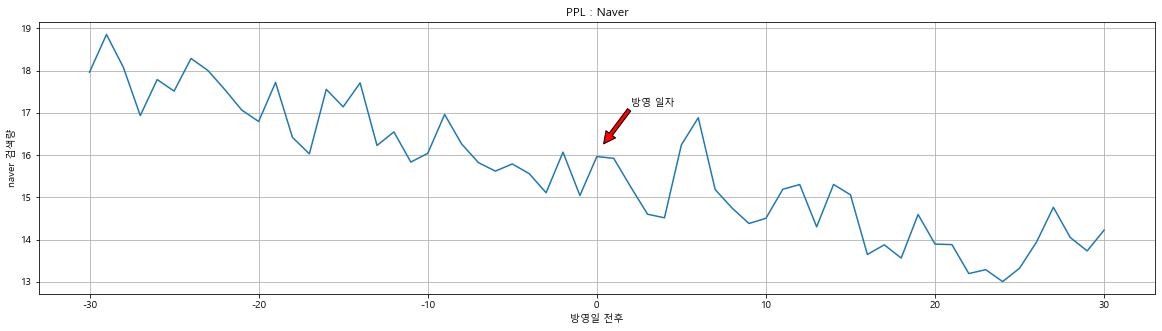

In [98]:
plt.figure(figsize=(20,5))
AP['평균'].plot()
plt.xlabel('방영일 전후')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# plt.text(30,AP['평균'][30],'방영일자')
plt.annotate('방영 일자',
            xy = (0+0.4, AP['평균'][0]+0.3),
            xytext = (0+2, AP['평균'][0]+1.2),
            arrowprops={'facecolor' : 'red'}
            )
plt.grid(True)

plt.show()